<div style="text-align:center">
    <h1 style="color:blue;text-shadow: 2px 2px #E0E0E0">Projeto de Análise MyAnimeList</h1>
    <a href="https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data/" target="_blank">MyAnimeList Anime & Manga Dataset (July 2025)</a><br>
    <a href="https://github.com/Gregory280">Autor: Gregory280</a>
</div>

<p style="text-align:center">
    <b>Notebook 3 de 3<br>
    Insights</b>
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fonte de Dados
</h3>
<p>
    Conjunto de dados extraído de um banco de dados de animes e mangás conhecido como MyAnimeList.net.<br>
    Os dados extraídos são de animes e mangás disponíveis no site de até julho de 2025.<br>
    Contém dois arquivos .csv com um total de 105.983 entradas extraídas, sendo 28.635 entradas de animes. 
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Pacotes Python
</h3>

In [1]:
#!pip install -q -U watermark

In [2]:
#!pip install -q missingno

In [3]:
# Pacotes utilizados
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Gregory280"

Author: Gregory280



<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Respondendo Perguntas Sobre os Dados
</h3>

In [5]:
# Carregamos a variável contendo o dataframe do notebook anterior
%store -r df_limpo

<h4 style="font-weight: bold">
    Quais são os 15 estúdios com mais animes produzidos?
</h4>

In [6]:
# Carregando df_frequencia_studios
df_frequencia_studios = pd.read_parquet("../data/processed/df_frequencia_studios.parquet")

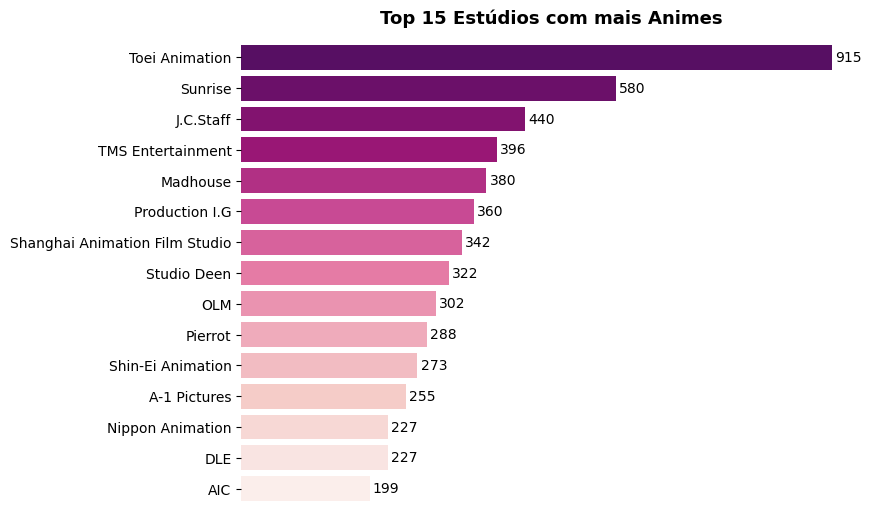

In [7]:
plt.figure(figsize=(8,6))
titulo = plt.title('Top 15 Estúdios com mais Animes', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_studios.head(15), x='frequencia', y='estudio', palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
         A <b>Toei Animation</b> é o estúdio com mais animes produzidos dentro dos 28635 mil animes extraídos do MAL e com muita folga.
    </li>
    <li>
        O segundo estúdio com mais animes produzidos é Sunrise e possui pouco mais que a metade do total dos animes pela Toei
    </li>
    <li>
        O último do Top 15 é o estúdio AIC e tem apenas 199, uma diferença de 716 animes.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais são os 15 temas mais comuns nos animes?
</h4>

In [8]:
# Carregando df_frequencia_themes
df_frequencia_themes = pd.read_parquet("../data/processed/df_frequencia_themes.parquet")

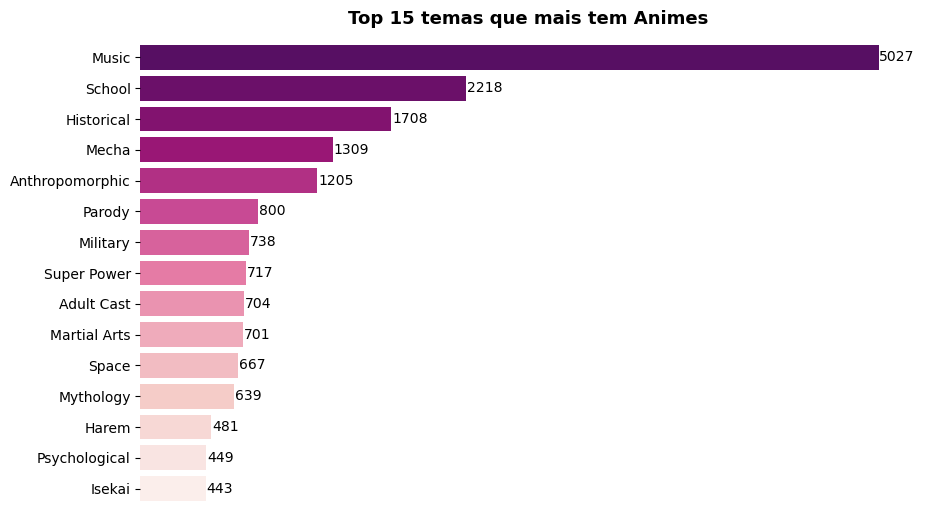

In [9]:
plt.figure(figsize=(10,6))
titulo = plt.title('Top 15 temas que mais tem Animes', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_themes.head(15), x='frequencia', y='tema',  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
         O tema músical está presente em mais de 5 mil animes, sendo o tema mais presente nos animes do MAL.
    </li>
    <li>
        Temos aproximadamente 7 vezes mais animes com tematica músical do que animes com temática de artes marciais.
    </li>
    <li>
        Em segundo lugar temos animes com tema escolar que são bem comuns e presentes em todas temporadas de animes.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais são os 15 temas que mais aparecem juntos?
</h4>

In [10]:
# Cria matriz de coocorrências de temas
mlb = MultiLabelBinarizer()
# Separa os temas
temas_bin = mlb.fit_transform(df_limpo['themes'])
df_temas_bin = pd.DataFrame(temas_bin, columns=mlb.classes_)
matriz = df_temas_bin.T.dot(df_temas_bin)
matriz_triang = matriz.where(~np.triu(np.ones(matriz.shape)).astype(bool))
ocorrencias_temas = (matriz_triang.stack().loc[lambda s: s > 0].sort_values(ascending=False))

In [11]:
# Renomeia as colunas
df_pares_temas = ocorrencias_temas.reset_index()
df_pares_temas.columns = ['tema1', 'tema2', 'frequencia']

In [12]:
df_pares_temas.shape

(680, 3)

In [13]:
# Cria uma nova coluna concatenando os nomes dos temas
df_pares_temas['temas'] = df_pares_temas['tema1'] + ' & ' + df_pares_temas['tema2']

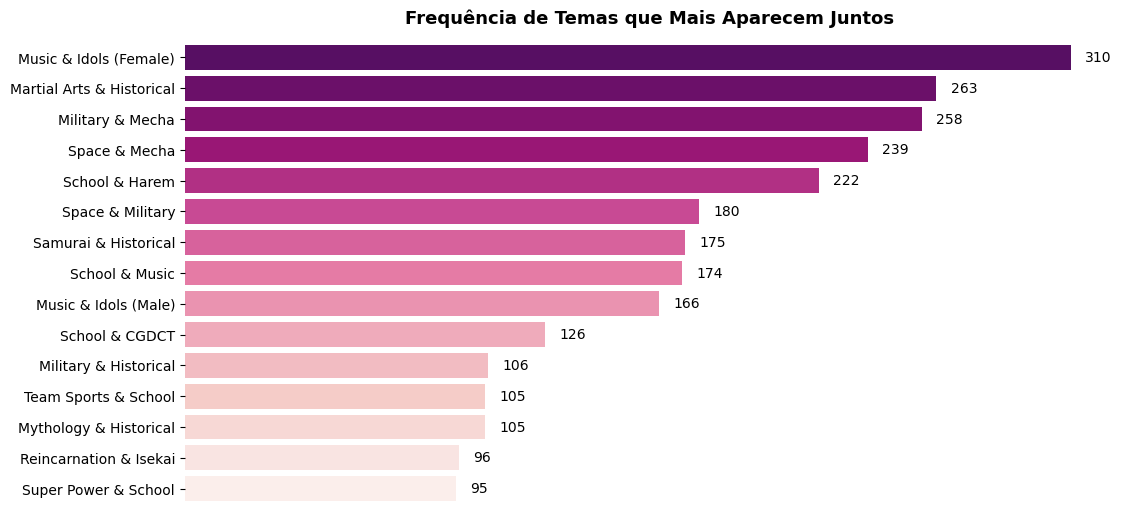

In [14]:
plt.figure(figsize=(12,6))
titulo = plt.title('Frequência de Temas que Mais Aparecem Juntos', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_pares_temas.head(15), x='frequencia', y='temas', palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Houveram 680 combinações de temas diferentes ao total.
    </li>
    <li>
        As ocorrências de temas mais comuns nos animes são o tema <b>musical</b> e <b>idols (femininas)</b>, o que faz muito sentido, pois são temas que se complementam.
    </li>
    <li>
        Os temas militar e mecha estarem juntos também faz muito sentido visto que são temas de histórias muito comuns nos animes.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais são os temas mais comuns que aparecem com o tema Escolar?
</h4>

In [15]:
# Pega o gênero School em qualquer posição do par
df_pares_school = df_pares_temas[
    (df_pares_temas['tema1'] == 'School') | (df_pares_temas['tema2'] == 'School')
]

In [16]:
df_pares_school.shape

(49, 4)

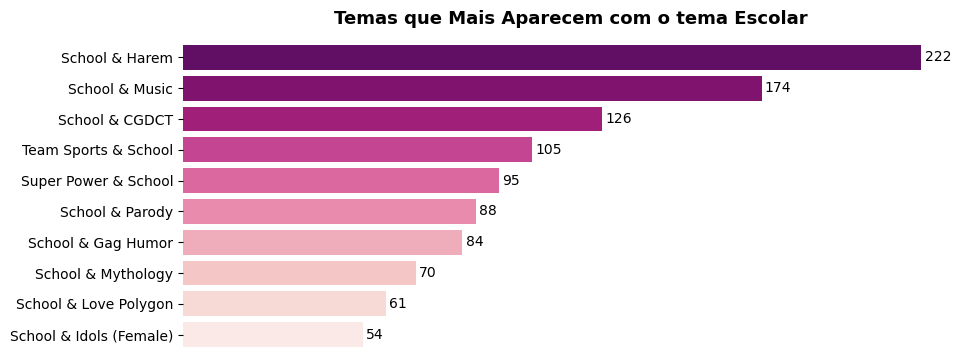

In [17]:
plt.figure(figsize=(10,4))
titulo = plt.title('Temas que Mais Aparecem com o tema Escolar', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_pares_school.head(10), x='frequencia', y='temas', palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Animes com a temática escolar são mais comuns junto da <b>temática harém</b>.
    </li>
    <li>
        Outros temas bem comuns que vemos toda temporada são os animes escolares e musicais e animes de esportes que se passam no ambiente escolar.
    </li>
    <li>
        Constatamos os animes com temática escolar geralmente estão atrelados a temáticas harém, musical, CGDCT (garotas fofas fazendo coisas fofas) e times de esporte.
    </li>
</ul>

<h4 style="font-weight: bold">
    Como é a distribuição de notas dos animes com tema Isekai?
</h4>

In [18]:
df_isekai = df_limpo.explode('themes')

In [19]:
df_isekai = df_isekai[df_isekai['themes'] == 'Isekai']

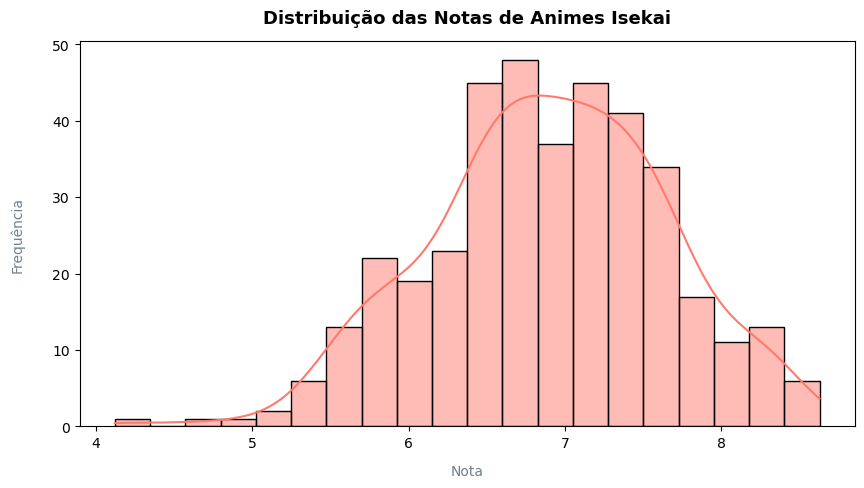

In [20]:
plt.figure(figsize=(10,5))
titulo = plt.title('Distribuição das Notas de Animes Isekai', fontsize=13, fontweight='bold', pad=13)
sns.histplot(df_isekai['score'], bins=20, kde=True, color=sns.xkcd_rgb['salmon'])
plt.xlabel("Nota", labelpad=10, color=sns.xkcd_rgb['steel grey'])
plt.ylabel("Frequência", labelpad=20, color=sns.xkcd_rgb['steel grey'])
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Em relação aos isekais, existem mais animes nota abaixo de 7 do que acima de 7.
    </li>
    <li>
        Tem mais animes com nota abaixo de 6 do que animes com nota acima de 8.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais são os 15 gêneros mais comuns nos animes?
</h4>

In [21]:
# Carregando df_frequencia_genres
df_frequencia_genres = pd.read_parquet("../data/processed/df_frequencia_genres.parquet")

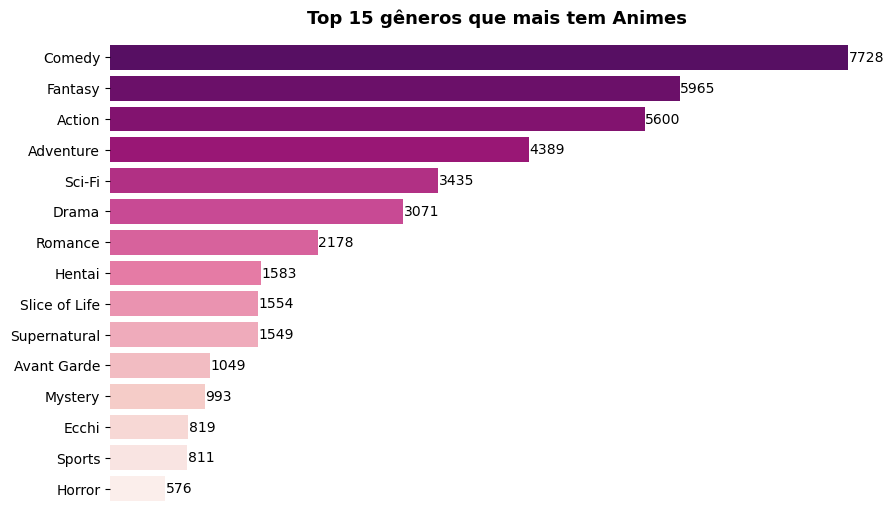

In [22]:
plt.figure(figsize=(10,6))
titulo = plt.title('Top 15 gêneros que mais tem Animes', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_genres.head(15), x='frequencia', y='genero',  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Comédia é o gênero mais comum.
    </li>
    <li>
        A diferença entre o gênero mais comum e o segundo é de 1.763 animes.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quantos % os 3 gêneros mais comuns representam em relação ao total? 
</h4>

In [23]:
# Pega os 3 gêneros que aparecem mais
top_3_genres = df_frequencia_genres.head(3)

In [24]:
# Soma o total de frequência 
total_genres = df_frequencia_genres['frequencia'].sum()
# Faz a porcentagem dos 3 gêneros com mais frequência
porcentagem_top_3 = top_3_genres['frequencia'].sum() / total_genres * 100
# Imprime o resultado
print(f"Os 3 gêneros mais frequentes representam {porcentagem_top_3:.2f}% dos animes.")

Os 3 gêneros mais frequentes representam 45.26% dos animes.


In [25]:
# Porcentagem do restante tirando o top 3
porcentagem_restante = 100 - porcentagem_top_3

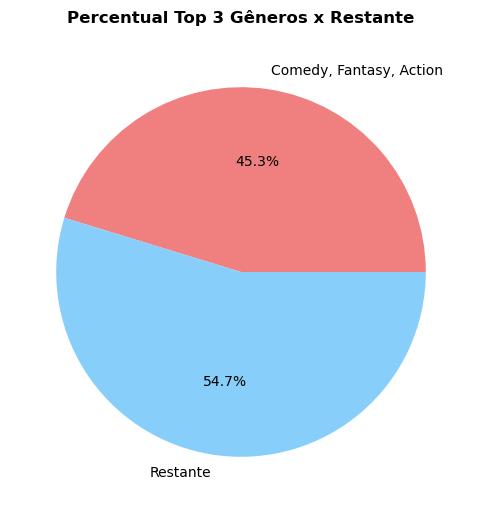

In [26]:
labels = ['Comedy, Fantasy, Action', 'Restante']
values = [porcentagem_top_3, porcentagem_restante]

plt.figure(figsize=(8,6))
titulo = plt.title('Percentual Top 3 Gêneros x Restante',  fontsize=12, fontweight='bold', pad=13)
plt.pie(values, labels=labels, colors=['lightcoral', 'lightskyblue'], autopct='%.1f%%')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Identificamos que os 3 gêneros mais comuns <b>(Comédia, Fantasia e Ação)</b> estão presentes em <b>quase metade (45.3%)</b> dos animes
    </li>
</ul>

<h4 style="font-weight: bold">
    Qual a média de notas dos animes por gênero? 
</h4>

In [27]:
# Separarmos os gêneros das listas para cada um ser representado em uma linha
df_limpo_exploded = df_limpo.explode('genres')

In [28]:
# Realizamos a média de nota por gênero
df_media_por_genero = df_limpo_exploded.groupby('genres')['score'].mean().sort_values(ascending=False)

In [29]:
# Renomeia as colunas
df_media_por_genero = df_media_por_genero.reset_index()
df_media_por_genero.columns = ['genero', 'nota_media']

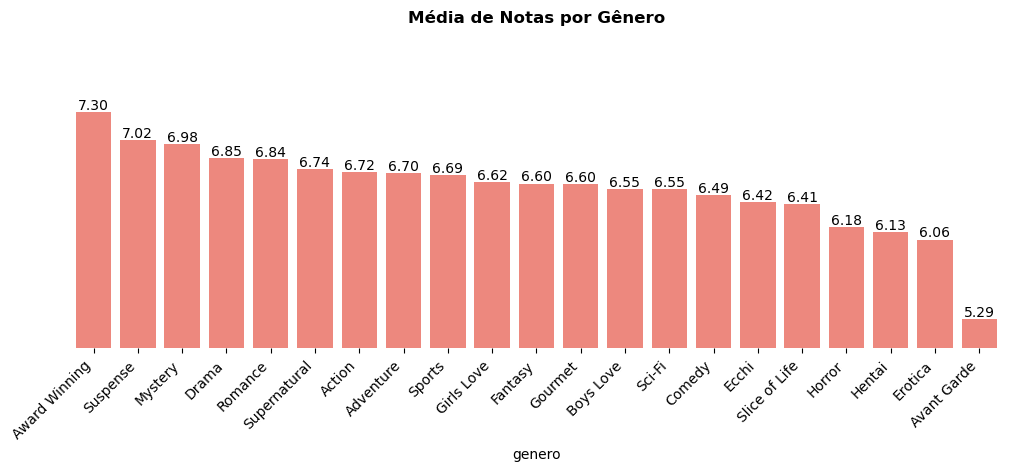

In [30]:
plt.figure(figsize=(12,4))
titulo = plt.title('Média de Notas por Gênero', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_media_por_genero, x='genero', y='nota_media', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.ylim(5,8)
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        O gênero Award Winning é destinado a obras que receberam prêmios, portante faz sentido ter uma média de nota maior que o restante.
    </li>
    <li>
        O gênero <b>Suspense possui a maior média de nota</b>. Apesar de não ser o gênero mais popular, é o mais bem avaliado dentro da plataforma.
    </li>
    <li>
        Animes com conteúdo sexual costumam ter notas abaixo de 6.4.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais gêneros mais aparecem juntos nos animes? 
</h4>

In [31]:
# Criando a matriz de coocorrências de gêneros
mlb = MultiLabelBinarizer()
generos_bin = mlb.fit_transform(df_limpo['genres'])
df_generos_bin = pd.DataFrame(generos_bin, columns=mlb.classes_)
matriz = df_generos_bin.T.dot(df_generos_bin)
matriz_triang = matriz.where(~np.triu(np.ones(matriz.shape)).astype(bool))
ocorrencias_generos = (matriz_triang.stack().loc[lambda s: s > 0].sort_values(ascending=False))

In [32]:
# Criando um dataframe para armazenar o resultado
df_pares_generos = ocorrencias_generos.reset_index()
df_pares_generos.columns = ['genero1', 'genero2', 'frequencia']

In [33]:
df_pares_generos.shape

(190, 3)

In [34]:
# Cria uma nova coluna concatenando os nomes dos gêneros
df_pares_generos['generos'] = df_pares_generos['genero1'] + ' & ' + df_pares_generos['genero2']

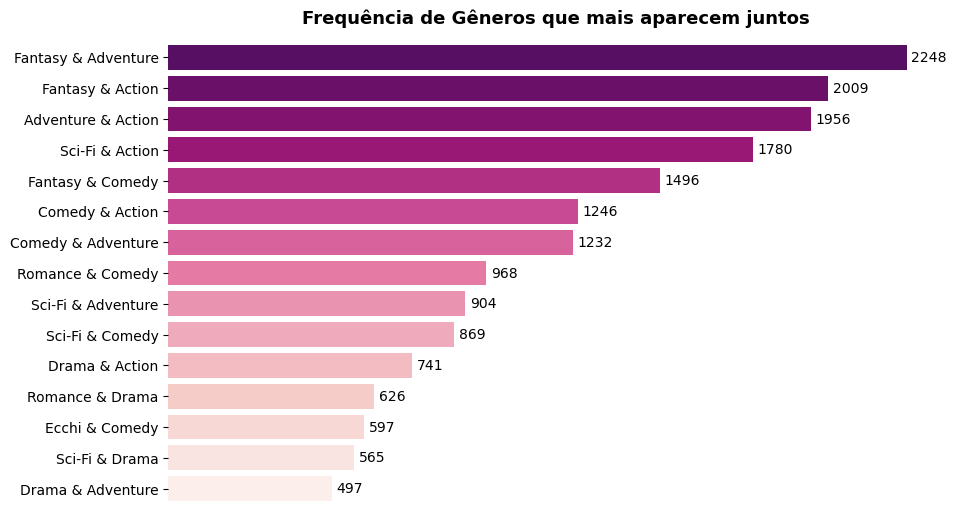

In [35]:
plt.figure(figsize=(10,6))
titulo = plt.title('Frequência de Gêneros que mais aparecem juntos', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_pares_generos.head(15), x='frequencia', y='generos',  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 15, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Os gêneros de <b>fantasia e aventura</b> são os mais comuns em animes. Por pouca diferença temos os gêneros de fantasia e ação como segundo mais comum.
    </li>
    <li>
        O gênero de fantasia aparece 3 vezes no top 5 das ocorrências.
    </li>
</ul>

<h4 style="font-weight: bold">
    Qual o gênero que mais aparece com o gênero Comédia? 
</h4>

In [36]:
# Pega o gênero comedy em qualquer posição do par
df_ocorrencias_comedy = df_pares_generos[
    (df_pares_generos['genero1'] == 'Comedy') | (df_pares_generos['genero2'] == 'Comedy')
]

In [37]:
# Crio uma nova coluna para concatenar os gêneros
df_ocorrencias_comedy['generos'] = df_ocorrencias_comedy['genero1'] + ' & ' + df_ocorrencias_comedy['genero2']

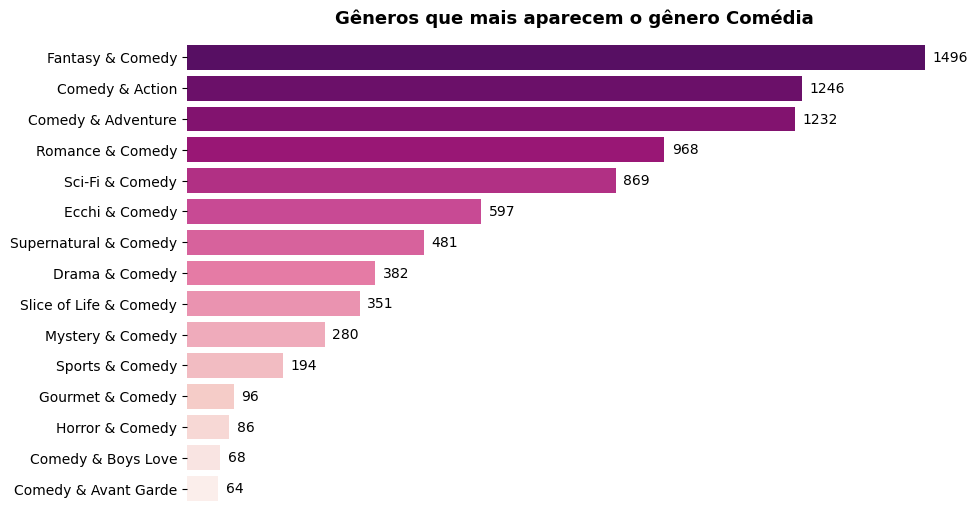

In [38]:
plt.figure(figsize=(10,6))
titulo = plt.title('Gêneros que mais aparecem o gênero Comédia', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_ocorrencias_comedy.head(15), x='frequencia', y='generos',  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 15, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        <b>Fantasia e Comédia</b> são gêneros de animes bem comuns com certa folga.
    </li>
    <li>
        Em segundo lugar temos Comédia e Ação.
    </li>
    <li>
        Animes de <b>comédia e suspense</b> são os menos comuns.
    </li>
</ul>

<h4 style="font-weight: bold">
    Qual a média de notas por demografias? 
</h4>

In [39]:
df_filtrado = df_limpo[df_limpo['demographic'].isin(['Shounen', 'Seinen', 'Kids', 'Josei', 'Shoujo'])]

In [40]:
# Calcular a média de score por demografia
df_medias_por_demografias = df_filtrado.groupby('demographic')['score'].mean().reset_index()

In [41]:
# Renomeia as colunas
df_medias_por_demografias.columns = ['demographic', 'media_score']

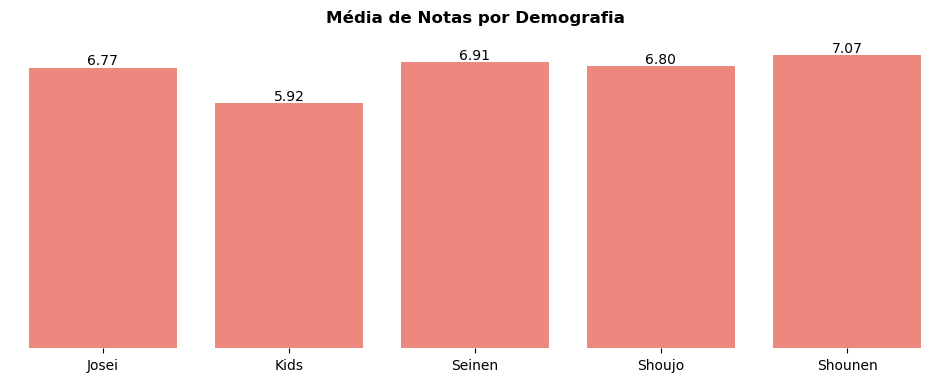

In [42]:
plt.figure(figsize=(12,4))
titulo = plt.title('Média de Notas por Demografia', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_medias_por_demografias, x='demographic', y='media_score', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.xlabel('')
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Animes da demografia infantil são os que possuem animes com <b>mais notas baixas</b>, apesar de estarem em maior quantidade.
    </li>
    <li>
        Animes <b>shounen</b> são <b>ligeiramente mais bem avaliados</b> que animes seinen.
    </li>
</ul>

<h4 style="font-weight: bold">
    Existem mais animes bem mal avaliados em shounen ou seinen? 
</h4>

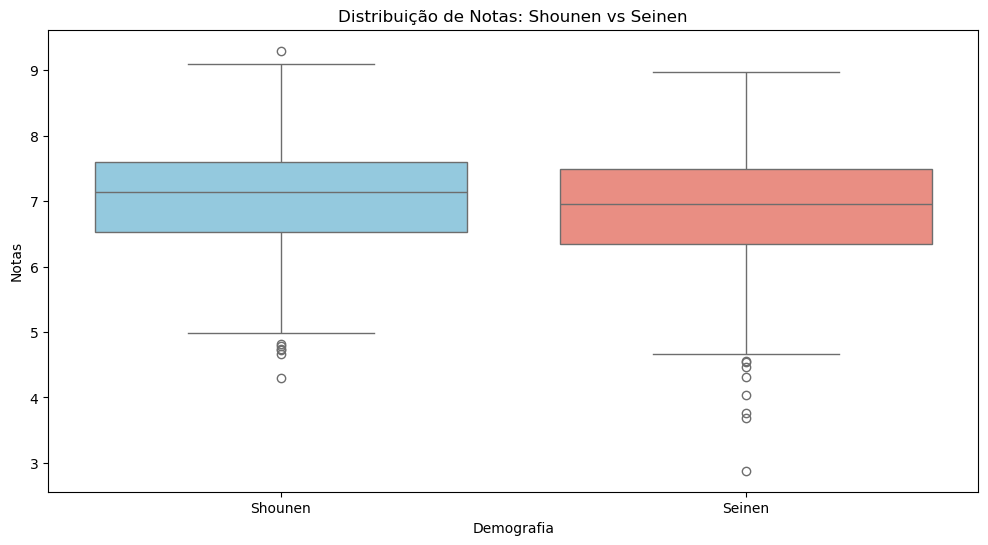

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_limpo[df_limpo['demographic'].isin(['Shounen', 'Seinen'])], x='demographic', y='score', palette=['skyblue','salmon'])
titulo = plt.title('Distribuição de Notas: Shounen vs Seinen')
plt.ylabel('Notas')
plt.xlabel('Demografia')
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A mediana de notas de shounen levemente acima de 7.0. enquanto a mediana dos seinen está no 7.0.
    </li>
    <li>
        Notamos que existem mais animes seinen bem mal avaliados do que shounen, o que faz com que a média abaixe e fique menor do que a média de nota dos animes shounen
    </li>
    <li>
        Existem <b>mais animes bem mal avaliados em seinen</b>. Há mais outliers (notas que fogem muito da média de notas comum) em seinen.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais são as quantidades de episódios mais comuns para animes (formato TV)? 
</h4>

<p>
    Vamos separar os animes seriados pelas suas <b>quantidades de episódios</b>.
</p>

In [44]:
# Pega somente os animes onde item_type = TV
df_tv = df_limpo[df_limpo['item_type'] == 'TV']

In [45]:
# Cria as faixas de episódios
bins = [0, 12, 24, 50, 100, np.inf]
labels = ['Até 12', 'Até 24', 'Até 50', 'Até 100', 'Mais de 100']

In [46]:
# Cria a coluna com base nas faixas
df_tv['episodes_faixa'] = pd.cut(df_tv['episodes'], bins=bins, labels=labels, right=True, include_lowest=True)

In [47]:
# Realiza a contagem da frequência por faixa de episódios
tv_ep_freq = (df_tv['episodes_faixa'].value_counts())

In [48]:
# Converte em um dataframe
df_tv_ep_freq = tv_ep_freq.to_frame().reset_index()

In [49]:
# Renomeia as colunas
df_tv_ep_freq.columns = ['faixa_episodes', 'contagem']

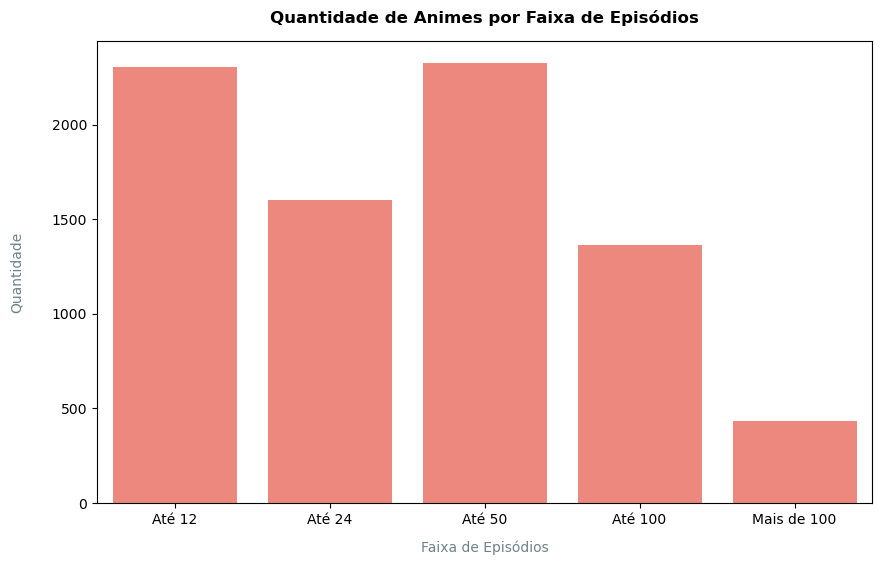

In [50]:
plt.figure(figsize=(10, 6))
titulo = plt.title("Quantidade de Animes por Faixa de Episódios", fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_tv_ep_freq, x='faixa_episodes', y='contagem', color=sns.xkcd_rgb['salmon'])
plt.xlabel("Faixa de Episódios", labelpad=10, color=sns.xkcd_rgb['steel grey'])
plt.ylabel("Quantidade", labelpad=20, color=sns.xkcd_rgb['steel grey'])
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A quantidade de animes que têm até 12 episódios tem aproximadamente a mesma quantidade de animes que têm até 50 episódios.
    </li>
    <li>
        Dentre 8.327 seriados de animes, apenas 432 possuem mais de 100 episódios.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais foram a quantidade de animes lançados nos últimos 15 anos por ano? 
</h4>

In [51]:
# Contagem por ano
animes_por_ano = df_limpo['start_year'].value_counts().sort_values(ascending=False)

In [52]:
# Renomeia as colunas
df_animes_por_ano = animes_por_ano.reset_index()
df_animes_por_ano.columns = ['ano', 'quantidade']

In [53]:
df_animes_por_ano.shape

(108, 2)

<p>
    Foram encontrados registros de animes em 108 anos diferentes.
</p>

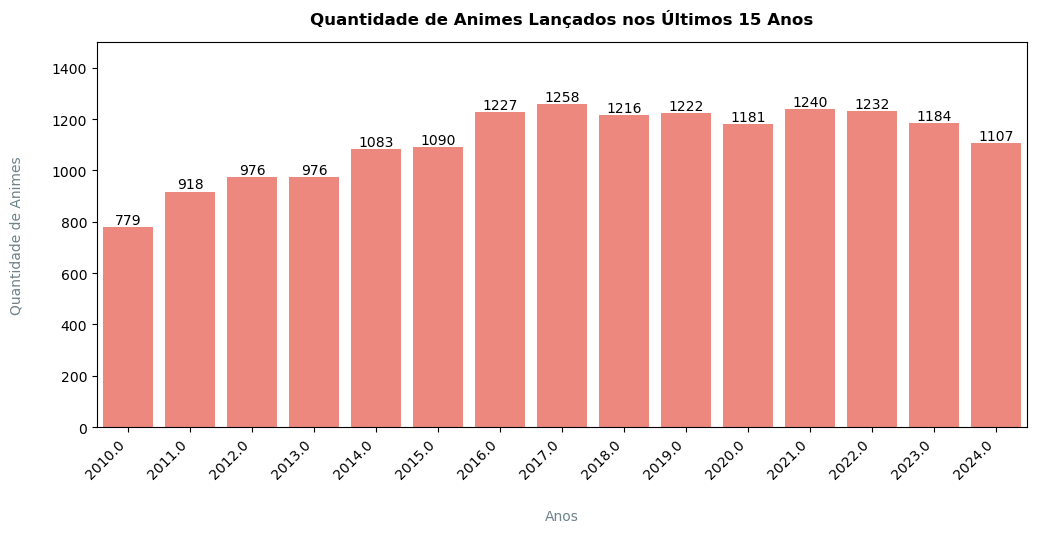

In [54]:
plt.figure(figsize=(12,5))
titulo = plt.title('Quantidade de Animes Lançados nos Últimos 15 Anos', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_animes_por_ano.head(15).sort_values('ano'), x='ano', y='quantidade', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)
plt.xlabel('Anos', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.ylabel('Quantidade de Animes', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.xticks(rotation=45, ha='right')
plt.ylim(0,1500)
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        O ano em que mais teve lançamento de anime foi o ano de <b>2017</b>, por apenas uma diferença de 18 animes entre o segundo colocado (ano 2021). 
    </li>
    <li>
        O ano que menos lançou anime na última década foi inevitavelmente 2010, o ano mais antigo dos útlimos 15.
    </li>
    <li>
        Percebe-se que começou uma tendência de queda a partir do ano de 2021.
    </li>
    <li>
        O ano de 2024 tem menos animes que o ano de 2016.
    </li>
</ul>

<h4 style="font-weight: bold">
    Quais as porcentagens de variação na quantidade de animes lançados em relação ao ano anterior?  
</h4>

In [55]:
df_animes_por_ano_desc = df_animes_por_ano.sort_values('ano', ascending=False).head(23)

In [56]:
df_animes_por_ano_desc['Variacao_Percentual'] = df_animes_por_ano_desc['quantidade'].pct_change(periods=-1) * 100

In [57]:
df_animes_por_ano_desc['Variacao_Percentual'] = df_animes_por_ano_desc['Variacao_Percentual'].round(2)

In [58]:
df_animes_por_ano_desc = df_animes_por_ano_desc[
    (df_animes_por_ano_desc['ano'] != 2025) &
    (df_animes_por_ano_desc['ano'] != 2026) &
    (df_animes_por_ano_desc['ano'] != 2027)
]

In [59]:
df_animes_por_ano_desc

,ano,quantidade,Variacao_Percentual
8,2024.0,1107,-6.50
6,2023.0,1184,-3.90
2,2022.0,1232,-0.65
1,2021.0,1240,5.00
7,2020.0,1181,-3.36
4,2019.0,1222,0.49
5,2018.0,1216,-3.34
0,2017.0,1258,2.53
3,2016.0,1227,12.57
9,2015.0,1090,0.65


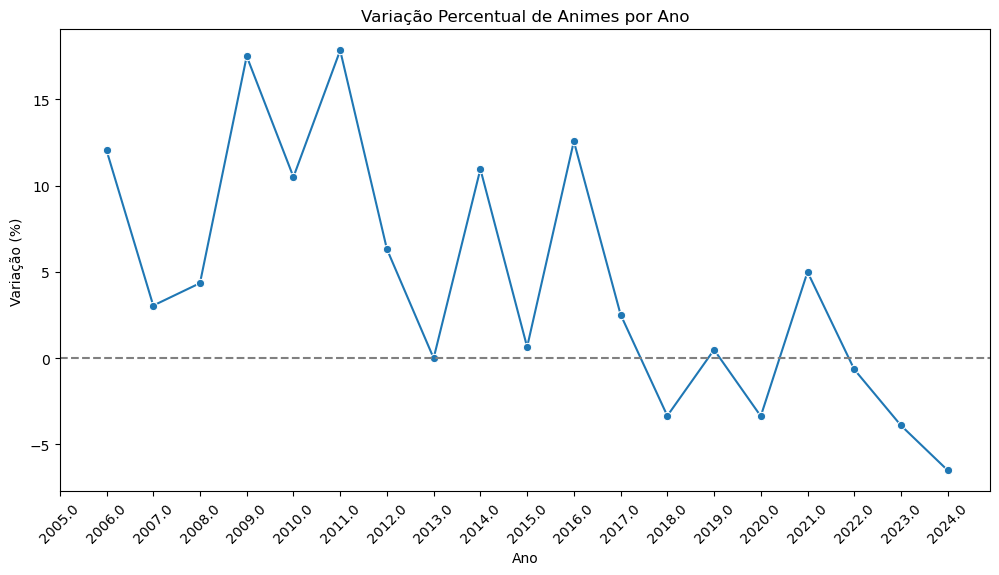

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_animes_por_ano_desc, x='ano', y='Variacao_Percentual', marker='o')
plt.axhline(0, color='gray', linestyle='--')  # linha de referência 0%
titulo = plt.title('Variação Percentual de Animes por Ano')
plt.xlabel('Ano')
plt.ylabel('Variação (%)')
plt.xticks(ticks=df_animes_por_ano_desc['ano'], labels=df_animes_por_ano_desc['ano'], rotation=45)
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()


<ul>
    <li>
        O gráfico em linhas nos ajuda a visualizar essa variação percentual.
    </li>
    <li>
        Dentre os últimos 20 anos, a última vez que tivemos um aumento maior de 10% na quantidade de animes lançados no ano foi em <b>2016</b>.
    </li>
    <li>
       Não temos um aumento de forma expressiva (10%) na quantidade de animes lançadas em relação ao ano interior desde 2016. 
    </li>
</ul>

<h4 style="font-weight: bold">
    Qual foi o ano que mais lançou animes do gênero Isekai?
</h4>

In [61]:
df_isekai = df_limpo.explode('themes')

In [62]:
df_isekai = df_isekai[df_isekai['themes'] == 'Isekai']

In [63]:
animes_isekai_por_ano = df_isekai['start_year'].value_counts()

In [64]:
animes_isekai_por_ano = animes_isekai_por_ano.drop([2025, 2026])

In [65]:
# Pega apenas os últimos 25 anos para não pouluir o gráfico
animes_isekai_por_ano = animes_isekai_por_ano[animes_isekai_por_ano.index >= 2003 ]

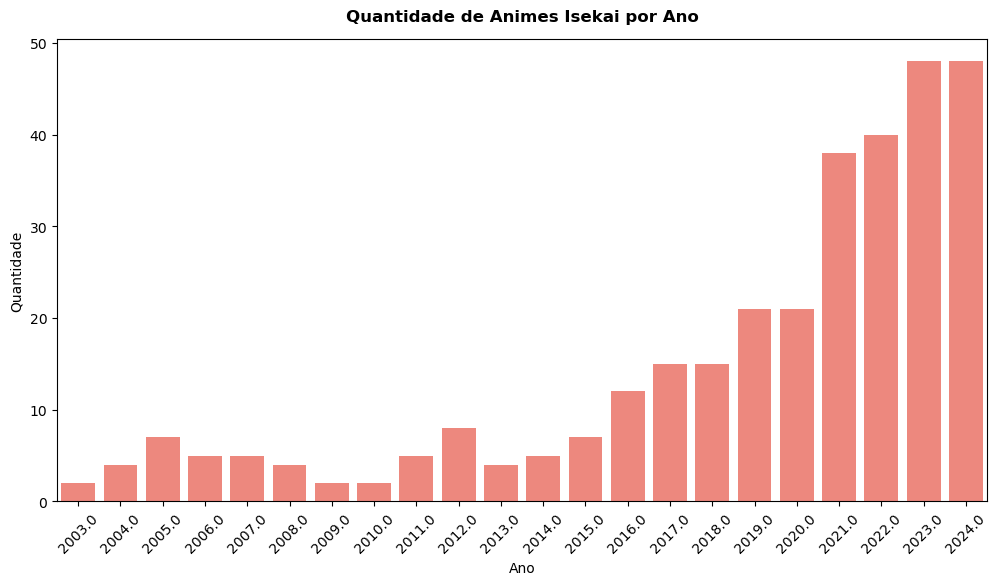

In [66]:
plt.figure(figsize=(12,6))
titulo = plt.title('Quantidade de Animes Isekai por Ano', fontsize=12, fontweight='bold', pad=13)
sns.barplot(x=animes_isekai_por_ano.index, y=animes_isekai_por_ano.values, color=sns.xkcd_rgb['salmon'])
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
# Para salvar os gráficos
plt.savefig(f"../graphs/insights/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        O número de isekais lançado começou a crescer a partir do ano de 2014.
    </li>
    <li>
        Depois de 2020 houve um aumento significativo de animes isekais e o movimento não perdeu força.
    </li>
</ul>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fim
</h4>

<p>
    To be continue...
</p>

In [67]:
%watermark -a "Gregory280"

Author: Gregory280



In [68]:
%watermark --iversions

pandas    : 2.2.3
numpy     : 2.1.3
missingno : 0.5.2
matplotlib: 3.10.0
seaborn   : 0.13.2
sklearn   : 1.6.1

